In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
df = pd.read_csv("../data/Employee_Salary_Dataset.csv")

In [3]:
# Print first 5 values
df.head()

,ID,Age,Experience_Years,Gender,Salary
0,1,24,4,Male,673940
1,2,37,12,Male,1264193
2,3,32,12,Female,1238252
3,4,28,8,Male,939265
4,5,25,8,Male,947774


In [4]:
# Describe
df.describe()

,ID,Age,Experience_Years,Salary
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,31.771000,8.898000,1.037222e+06
std,288.819436,8.463462,4.275497,3.325512e+05
min,1.000000,18.000000,0.000000,3.287650e+05
25%,250.750000,24.000000,6.000000,7.916432e+05
50%,500.500000,32.000000,12.000000,1.253044e+06
75%,750.250000,39.000000,12.000000,1.285962e+06
max,1000.000000,45.000000,12.000000,1.333280e+06


In [5]:
# Columns
df.columns

Index(['ID', 'Age', 'Experience_Years', 'Gender', 'Salary'], dtype='object')

In [6]:
# Check for null values
df.isnull().sum()

ID                  0
Age                 0
Experience_Years    0
Gender              0
Salary              0
dtype: int64

In [7]:
# Outlier Removal using IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print(f"Removed {len(df) - len(df_no_outliers)} outlier rows.")

Removed 0 outlier rows.


In [8]:
# Feature and target prep
X = df_no_outliers.drop(columns=['ID', 'Salary']).values
y = df_no_outliers['Salary'].values

In [9]:
# Encode Gender label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])  # column index for Gender

In [10]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# Evaluate metrics
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R2: {r2}")

MAE: 13068.97834904014
R2: 0.998086645527591


In [13]:
# Show predicted vs actual
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1265987.31 1289839.  ]
 [1265987.31 1290032.  ]
 [1273488.67 1299407.  ]
 [ 352279.3   375409.  ]
 [1288491.39 1289863.  ]
 [1270515.87 1253289.  ]
 [ 352279.3   332550.  ]
 [1293019.96 1300068.  ]
 [1269737.99 1256086.  ]
 [1281767.91 1269229.  ]
 [1277239.35 1291179.  ]
 [1288491.39 1279369.  ]
 [1278017.23 1297452.  ]
 [1266765.19 1277915.  ]
 [1300521.32 1315841.  ]
 [ 433959.71  433779.  ]
 [1262236.63 1239026.  ]
 [1307244.8  1326187.  ]
 [ 577150.09  583350.  ]
 [1270515.87 1250768.  ]
 [1248011.78 1233993.  ]
 [1289269.28 1276055.  ]
 [1307244.8  1312322.  ]
 [1295992.76 1278432.  ]
 [1289269.28 1279762.  ]
 [ 730814.64  738380.  ]
 [1277239.35 1284267.  ]
 [1108572.08 1095419.  ]
 [1278017.23 1288648.  ]
 [1277239.35 1264193.  ]
 [1113100.65 1120751.  ]
 [1296770.64 1280648.  ]
 [ 430986.92  437384.  ]
 [ 359002.78  362235.  ]
 [ 718784.71  725422.  ]
 [1026891.67 1016334.  ]
 [1258485.94 1236818.  ]
 [1263014.51 1264501.  ]
 [1281767.91 1289522.  ]
 [1289269.28 1279185.  ]


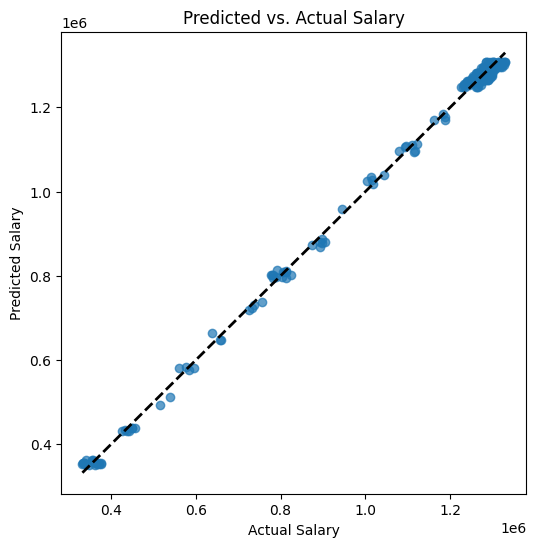

In [14]:
# Plot predicted vs actual salary
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs. Actual Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()